### **1. Import libraries and dataset**

Import the libraries

In [ ]:
import numpy as np ## pip install numpy==2.1 #need this to run ydata-profiling
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency # filter method
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport 
import matplotlib.pyplot as plt
from pathlib import Path

import sys


Import the dataset

In [2]:
#import sys
#sys.path.append('..')

# Get the path of this notebook
base_path = Path.cwd()

# Build the path to the dataset relative to the project structure
data_path = base_path / "data" / "processed" / "HR_1_1.csv"

# Load the original file
HR_1_1 = pd.read_csv(base_path / "data" / "processed" / "HR_1_1.csv")


## **2. Feature Selection**

The purpose of this section is to analyze potential correlations among the various variables in the dataset as a form of filter **Feature Selection**.

**Numerical features** were scaled using `MinMaxScaler()`. **Categorical features** were **encoded** and converted into numerical representations so that machine learning algorithms can process and interpret them effectively.

### **2.1. Spearman correlation analysis**

Spearman is useful to understand if there are redundant features with high correlation to disconsider. It is suitable for continuous and ordinal data.

In [3]:
correlation_HR_1_1 = HR_1_1.corr(method='spearman', numeric_only=True)
correlation_HR_1_1

,EmployeeNumber,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,1.000000,-0.001770,-0.010369,-0.051800,0.038906,0.042815,0.021750,0.034717,-0.002453,-0.011057,...,-0.014098,-0.018322,0.023770,0.006831,-0.008074,-0.008106,0.022075,0.053846,-0.035480,-0.024250
Age,-0.001770,1.000000,-0.171214,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,...,0.184877,-0.152827,-0.001102,-0.174193,-0.021040,0.018513,-0.036088,0.077494,-0.113026,0.027044
Attrition,-0.010369,-0.171214,1.000000,-0.056970,0.079248,-0.030346,-0.096486,-0.006692,-0.119496,-0.190370,...,-0.088870,-0.000360,0.019774,0.157234,0.115143,-0.049538,0.029453,-0.090984,0.175419,0.246118
DailyRate,-0.051800,0.007290,-0.056970,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,...,0.000897,-0.002829,-0.000181,0.005845,-0.012103,0.002207,-0.011415,0.040180,-0.076012,0.008383
DistanceFromHome,0.038906,-0.019291,0.079248,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,...,-0.018166,-0.016738,0.044678,-0.005625,-0.008361,-0.004095,0.004387,0.017019,-0.026259,0.036639
Education,0.042815,0.204937,-0.030346,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,...,0.046079,0.004425,0.051082,-0.083289,-0.006252,0.002990,-0.009903,-0.001209,0.006131,-0.017003
EnvironmentSatisfaction,0.021750,0.009820,-0.096486,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,...,-0.046003,0.003960,-0.024693,-0.001975,-0.010527,0.007131,0.001863,-0.028464,0.013736,0.067670
HourlyRate,0.034717,0.028858,-0.006692,0.023511,0.020446,0.014432,-0.052380,1.000000,0.043884,-0.033876,...,-0.025475,0.019262,-0.012116,-0.018345,-0.019292,0.028003,-0.000278,0.035371,-0.032502,-0.009140
JobInvolvement,-0.002453,0.034456,-0.119496,0.042469,0.034430,0.037231,-0.015301,0.043884,1.000000,-0.018424,...,0.016192,0.044358,-0.010484,-0.022248,0.006497,0.019436,0.022468,0.022918,-0.046740,-0.001866
JobLevel,-0.011057,0.489618,-0.190370,0.003816,0.022148,0.107419,-0.000192,-0.033876,-0.018424,1.000000,...,0.348861,-0.439853,0.251200,-0.254342,-0.016058,0.008832,-0.050875,0.050213,-0.090430,-0.000394


In [4]:
sorted_columns = sorted(correlation_HR_1_1.columns)
correlation_HR_1_1_sorted = correlation_HR_1_1.loc[sorted_columns, sorted_columns]

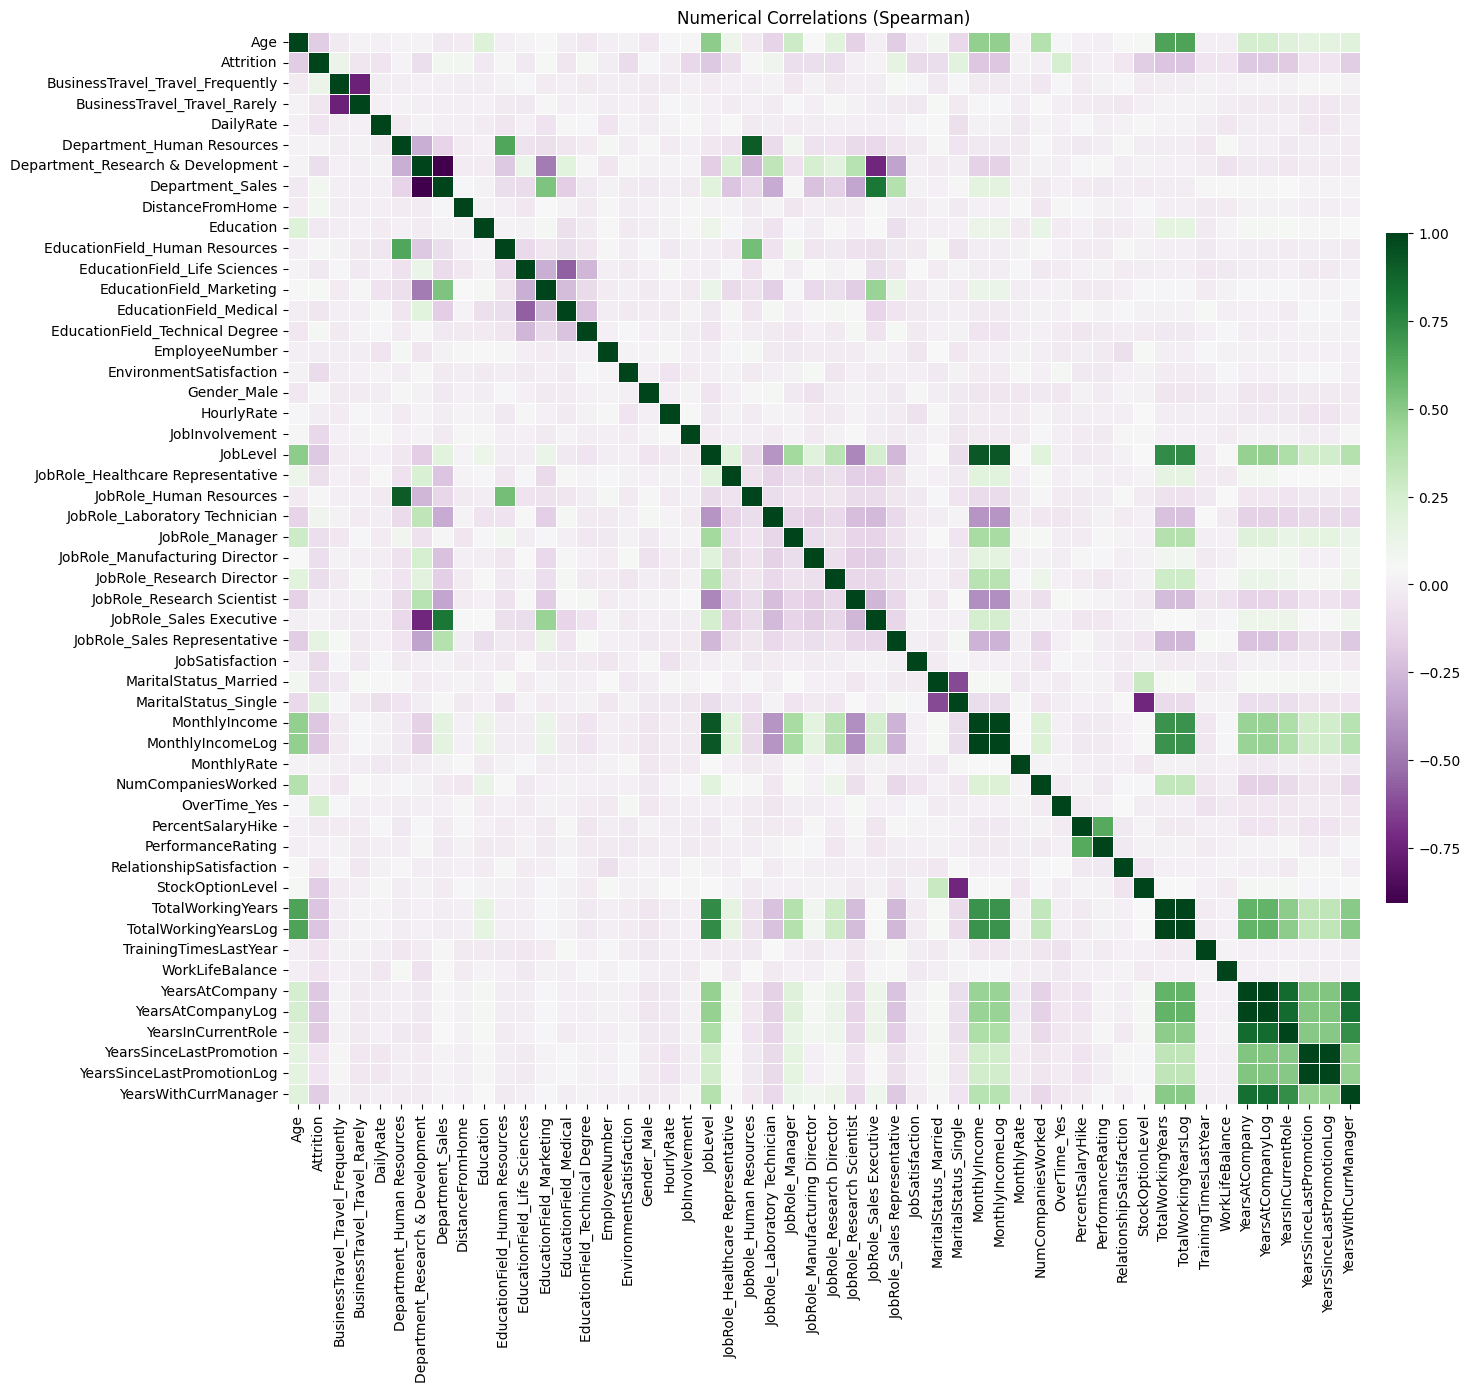

In [5]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_HR_1_1_sorted, cmap="PRGn", square=True, linewidths=0.5, annot=False, cbar_kws={
        'shrink': 0.6,      # Makes colorbar smaller (60% of default)
        'aspect': 30,        # Makes colorbar narrower
        'pad': 0.02          # Adds space between plot and colorbar
    })
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

#### **Insights**
**Highlights of features and target category:**

The image above allows to conclude that aren't strong correlations between the features and the target variable (Attrition). However, some points to hightlight 

- **Attrition and Age:** the spearman correlation coefficient is -0.171214, which is a negative relationship. This can be interpreted as the age increases the attrition score decreases, so <u>older employees are less likely to leave the company</u>. However, the score is low so the variable by itself doesn't explain the attrition. 

- **Attrition and Job Level:** the spearman correlation coefficient is -0.190370, also a negative relationship. The job level variable represents the hierarchy at the company and this suggests that <u> as the level is higher, the attrition score decreases</u>.

- **Attrition and Monthly Income:** the spearman correlation coefficient is -0.199086, also a negative relationship. As the monthly income increases the attrition score tends to be lower, indicating that <u>higher incomes are associated with a lower rate of employee turnover</u>.

- **Attrition and Total Working Years:** the spearman correlation coefficient is -0.199320, which indicates that <u>more years working represents a decrease in the attrition score</u>. It corroborates the age seen previously, although it is interesting that the age itself doesn't have a strong correlation with the total working years.

- **Attrition and Years at the Company:** the spearman correlation coefficient is -0.191121, which indicates a <u>lower score of attrition when the employee has more years of work in the company</u>.

- **Attrition and Years in the Current Role:** the spearman correlation coefficient is -0.180566, indicates that <u>more years in the current rule are slightly related with lower attrition score</u>.

- **Attrition and Years with the Current Manager:** the spearman correlation coefficient is -0.175355, indicates that <u>more years with the current manager represents a lower attrition score</u>.

**Highlights of other feature relations:**

The strongest correlation coefficients -  the darkest spots were observed among the dummy variables for features like Department, Gender, and Marital Status due to the structural artifacts of the data encoding process, not signals of real-world predictive power. 

These strong relationships, particularly the high negative ones, result from multicollinearity. When a categorical feature with $N$ options is converted into $N$ binary dummy columns (e.g., Gender_Male and Gender_Female), the columns are perfectly or near-perfectly dependent: if one is 1' (True), the other(s) must be '0' (False). 

For instance, the perfect negative correlation of $-1.0$ between Gender_Male and Gender_Female simply confirms that a person cannot be both simultaneously. 

While mathematically sound, these high correlations are uninformative for predicting Attrition and would be ignored when assessing external factors influencing employee turnover.

The focus must remain on the weaker, yet meaningful, correlations found between the demographic/satisfaction variables and the target variable, Attrition.

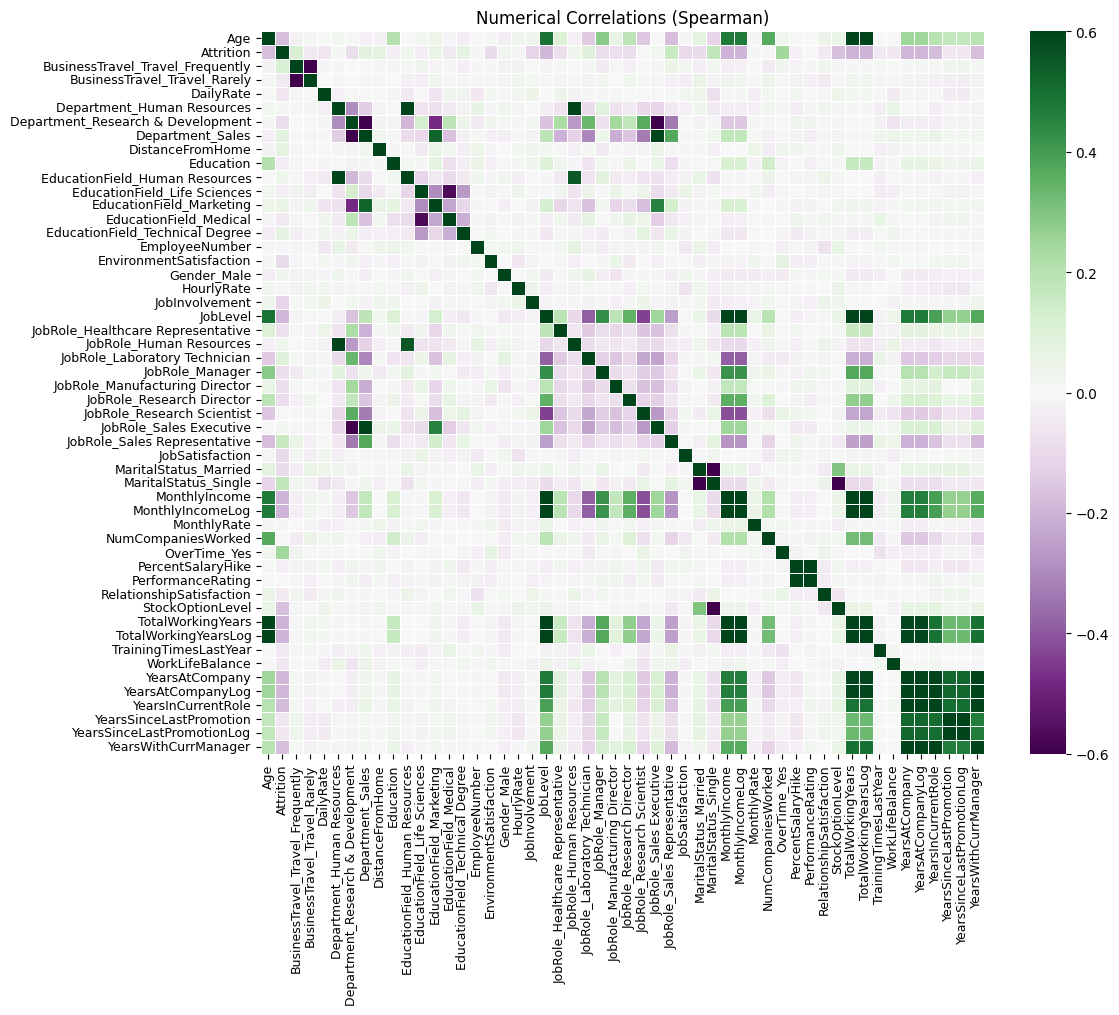

In [6]:
correlation1 = HR_1_1.corr(method='spearman', numeric_only=True)

sorted_columns = sorted(correlation1.columns)
correlation1_sorted = correlation1.loc[sorted_columns, sorted_columns]

numeric_cols = HR_1_1.select_dtypes(include=['number']).columns

#scaler = MinMaxScaler()
#correlation1[numeric_cols] = scaler.fit_transform(correlation1[numeric_cols])

plt.figure(figsize=(12, 10))
sns.heatmap(correlation1_sorted, cmap="PRGn", square=True, linewidths=0.5, vmin=-0.6, vmax=0.6, annot=False)
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

### **2.2. Remove redundant variables (>0.65 correlation)**

Use the variables studied on the Spearman correlation analysis

In [7]:
correlation1_sorted

,Age,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,DailyRate,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,...,TotalWorkingYears,TotalWorkingYearsLog,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsAtCompanyLog,YearsInCurrentRole,YearsSinceLastPromotion,YearsSinceLastPromotionLog,YearsWithCurrManager
Age,1.000000,-0.171214,-0.021040,0.018513,0.007290,0.020814,0.018278,-0.028086,-0.019291,0.204937,...,0.656802,0.656802,0.001396,-0.003707,0.250337,0.250337,0.197952,0.171492,0.171492,0.194821
Attrition,-0.171214,1.000000,0.115143,-0.049538,-0.056970,0.016832,-0.085293,0.080855,0.079248,-0.030346,...,-0.199320,-0.199320,-0.051347,-0.051951,-0.191121,-0.191121,-0.180566,-0.053762,-0.053762,-0.175355
BusinessTravel_Travel_Frequently,-0.021040,0.115143,1.000000,-0.753092,-0.012103,-0.007485,0.003340,-0.000160,-0.008361,-0.006252,...,-0.011014,-0.011014,0.011582,0.007543,0.017300,0.017300,0.016146,0.035392,0.035392,0.012914
BusinessTravel_Travel_Rarely,0.018513,-0.049538,-0.753092,1.000000,0.002207,0.009618,0.000465,-0.004718,-0.004095,0.002990,...,0.023961,0.023961,0.010540,-0.009466,-0.022730,-0.022730,-0.024599,-0.037283,-0.037283,-0.023301
DailyRate,0.007290,-0.056970,-0.012103,0.002207,1.000000,-0.027101,0.014350,-0.002912,-0.002754,-0.013607,...,0.021733,0.021733,-0.012206,-0.040352,-0.009335,-0.009335,0.007281,-0.037863,-0.037863,-0.004716
Department_Human Resources,0.020814,0.016832,-0.007485,0.009618,-0.027101,1.000000,-0.290754,-0.139650,-0.017161,0.006396,...,-0.006498,-0.006498,-0.036966,0.055457,-0.000763,-0.000763,-0.029643,-0.007159,-0.007159,-0.014794
Department_Research & Development,0.018278,-0.085293,0.003340,0.000465,0.014350,-0.290754,1.000000,-0.906818,-0.019487,-0.017674,...,0.009327,0.009327,-0.019138,-0.067055,-0.035285,-0.035285,-0.037378,-0.015640,-0.015640,-0.014655
Department_Sales,-0.028086,0.080855,-0.000160,-0.004718,-0.002912,-0.139650,-0.906818,1.000000,0.027727,0.015473,...,-0.006790,-0.006790,0.036092,0.044964,0.036853,0.036853,0.051742,0.019340,0.019340,0.021685
DistanceFromHome,-0.019291,0.079248,-0.008361,-0.004095,-0.002754,-0.017161,-0.019487,0.027727,1.000000,0.015708,...,-0.003065,-0.003065,-0.025876,-0.020402,0.011119,0.011119,0.013732,-0.005071,-0.005071,0.004422
Education,0.204937,-0.030346,-0.006252,0.002990,-0.013607,0.006396,-0.017674,0.015473,0.015708,1.000000,...,0.161789,0.161789,-0.022948,0.017350,0.063552,0.063552,0.054589,0.032035,0.032035,0.051270


- Age (-0.17) is highly overall correlated with **TotalWorkingYears** (-0.20)
- Department (0.08) is highly overall correlated with EducationField (0.07) and JobRole (0.16)
- EducationField (0.07) is highly overall correlated with Department (0.08)
- JobLevel (-0.19) is highly overall correlated with JobRole (0.16),  MonthlyIncome (0.015), and **TotalWorkingYears (-0.20)**
- JobRole (0.16) is highly overall correlated with Department (0.08) and JobLevel (-0.19)
- **MaritalStatus (0.18)** is highly overall correlated with StockOptionLevel (-0.17)
- MonthlyIncome (0.015) is highly overall correlated with JobLevel (-0.19) and **TotalWorkingYears** (-0.20)
- **PercentSalaryHike (-0.02)** is highly overall correlated with PerformanceRating (---)
- PerformanceRating (---) is highly overall correlated with PercentSalaryHike (-0.02)
- StockOptionLevel (-0.17) is highly overall correlated with **MaritalStatus** (0.18)
- **TotalWorkingYears (-0.20)** is highly overall correlated with Age (-0.17), JobLevel (-0.19), YearsAtCompany (-0.19) and MonthlyIncome (0.015)
- YearsAtCompany (-0.19) is highly overall correlated with **TotalWorkingYears (-0.20)**, YearsInCurrentRole (-0.18), YearsSinceLastPromotion (-0.05), YearsWithCurrManager (-0.18) 
- YearsInCurrentRole (-0.18) is highly overall correlated with **YearsAtCompany (-0.19)**, YearsSinceLastPromotion (-0.05), YearsWithCurrManager (-0.18)
- YearsSinceLastPromotion (-0.05) is highly overall correlated with YearsAtCompany (-0.19) and YearsInCurrentRole (-0.18)
- YearsWithCurrManager (-0.18) is highly overall correlated with YearsAtCompany (-0.19) and YearsInCurrentRole (-0.18)

**If two variables are correlated, we drop one of them, keeping the variable with largest correlation with the target**

Remove:
- Age
- Department
- EducationField
- JobLevel
- JobRole
- StockOptionLevel
- MonthlyIncome
- PerformanceRating
- YearsInCurrentRole

Keep:
- TotalWorkingYears
- MaritalStatus
- PercentSalaryHike
- YearsAtCompany

In [8]:
# If two variables are correlated, we drop one of them, keeping the variable with largest correlation with the target

# Compute correlation matrix
corr_matrix = HR_1_1.corr().abs()

# Target variable correlation
target = 'Attrition'
target_corr = corr_matrix[target].drop(target)  # drop self-correlation

# Correlation threshold
threshold = 0.65

# Initialize set for dropped columns
drop_cols = set()

# Iterate over the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    col1 = corr_matrix.columns[i]
    if col1 == target or col1 in drop_cols:
        continue

    for j in range(i + 1, len(corr_matrix.columns)):
        col2 = corr_matrix.columns[j]
        if col2 == target or col2 in drop_cols:
            continue

        # Check correlation between two features
        if corr_matrix.iloc[i, j] > threshold:
            # Compare correlation with target
            corr1 = target_corr.get(col1, 0)
            corr2 = target_corr.get(col2, 0)

            # Drop the one with smaller correlation to target
            if corr1 >= corr2:
                drop_cols.add(col2)
            else:
                drop_cols.add(col1)

print("Columns to drop due to high correlation:", drop_cols)
print("Number of columns to drop:", len(drop_cols))

# Create final dataset
HR_final = HR_1_1.drop(columns=list(drop_cols))
print("Final dataset shape:", HR_final.shape)
HR_final.head()


Columns to drop due to high correlation: {'Department_Human Resources', 'YearsAtCompany', 'YearsSinceLastPromotion', 'Department_Sales', 'BusinessTravel_Travel_Rarely', 'YearsInCurrentRole', 'MonthlyIncomeLog', 'PerformanceRating', 'JobRole_Sales Executive', 'YearsWithCurrManager', 'MonthlyIncome', 'TotalWorkingYears', 'JobLevel', 'Age'}
Number of columns to drop: 14
Final dataset shape: (1470, 38)


,EmployeeNumber,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,1,1102,1,2,2,94,3,4,19479,...,False,False,False,False,False,False,False,False,True,True
1,2,0,279,8,1,3,61,2,2,24907,...,False,False,False,True,False,True,True,True,False,False
2,4,1,1373,2,2,4,92,2,3,2396,...,False,False,False,False,False,False,True,False,True,True
3,5,0,1392,3,4,4,56,3,3,23159,...,False,False,False,True,False,True,False,True,False,True
4,7,0,591,2,1,1,40,3,2,16632,...,False,False,False,False,False,False,True,True,False,False


In [9]:
print("Kept columns:", [c for c in HR_final.columns if c not in drop_cols])


Kept columns: ['EmployeeNumber', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'TotalWorkingYearsLog', 'YearsAtCompanyLog', 'YearsSinceLastPromotionLog', 'Department_Research & Development', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']


#### Insights
From the redundant variables (>0.65 Spearman Correlation) we decided to:

Remove:
- Age
- Department
- EducationField
- JobLevel
- JobRole
- StockOptionLevel
- MonthlyIncome
- PerformanceRating
- YearsInCurrentRole

Keep:
- TotalWorkingYears
- MaritalStatus
- PercentSalaryHike
- YearsAtCompany

Non-redundant variables to keep in the dataset:
- EmployeeNumber
- Attrition
- DailyRate
- DistanceFromHome
- Education
- EnvironmentSatisfaction
- HourlyRate
- JobInvolvement
- JobSatisfaction
- NumCompaniesWorked
- PercentSalaryHike
- PerformanceRating
- RelationshipSatisfaction
- TrainingTimesLastYear
- WorkLifeBalance
- TotalWorkingYearsLog
- YearsAtCompanyLog
- YearsSinceLastPromotionLog
- Department_Research & Development
- EducationField_Human Resources
- EducationField_Life Sciences
- EducationField_Marketing
- EducationField_Medical
- EducationField_Technical Degree
- JobRole_Healthcare Representative
- JobRole_Human Resources
- JobRole_Laboratory Technician
- JobRole_Manager
- JobRole_Manufacturing Director
- JobRole_Research Director
- JobRole_Research Scientist
- JobRole_Sales Representative
- BusinessTravel_Travel_Frequently
- Gender_Male
- MaritalStatus_Married
- MaritalStatus_Single
- OverTime_Yes

### **2.3. Applying StratifiedKFold with chi-squared contingency**

We can use StratifiedKFold to better grasp the variables required to predict the Attrition target.

In [10]:
from sklearn.model_selection import StratifiedKFold

def select_best_cat_features(X, y, columns, n_splits=5, alpha=0.05):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    categorical_cols = columns

    significance_counts = {col: 0 for col in categorical_cols}

    for count, (train_index, val_index) in enumerate(skf.split(X, y), start=1):
        print(f'\n{"_"*40}\nSPLIT {count}\n')

        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_cat = X_train[categorical_cols]

        for col in X_cat.columns:
            contingency = pd.crosstab(X_cat[col], y_train)

            # --- NEW: skip empty tables ---
            if contingency.size == 0:
                print(f"{col}: skipped (empty contingency table)")
                continue

            # --- NEW: require at least TWO categories and TWO classes ---
            if contingency.shape[0] < 2 or contingency.shape[1] < 2:
                print(f"{col}: skipped (not enough categories/classes)")
                continue

            _, p, _, _ = chi2_contingency(contingency)
            if p < alpha:
                print(f"{col}: SIGNIFICANT (p={p:.4f})")
                significance_counts[col] += 1
            else:
                print(f"{col}: NOT significant (p={p:.4f})")

    print("\nSummary of significance across splits:")
    summary = pd.DataFrame.from_dict(significance_counts, orient='index', columns=['Significant_Splits'])
    summary['% Splits Significant'] = (summary['Significant_Splits'] / n_splits) * 100
    return summary.sort_values(by='Significant_Splits', ascending=False)

In [11]:
# check which variables significantly associate with the Attrition target variable
y = HR_final['Attrition'].copy()
X = HR_final.drop(columns=['Attrition']).copy()

# Select categorical and binary-like columns
columns = X.columns.tolist()

# Run Chi-Squared feature selection
result_df = select_best_cat_features(X, y, columns=columns)
print(result_df)


________________________________________
SPLIT 1

EmployeeNumber: NOT significant (p=0.4863)
DailyRate: NOT significant (p=0.3521)
DistanceFromHome: SIGNIFICANT (p=0.0050)
Education: NOT significant (p=0.5352)
EnvironmentSatisfaction: SIGNIFICANT (p=0.0001)
HourlyRate: NOT significant (p=0.4920)
JobInvolvement: SIGNIFICANT (p=0.0000)
JobSatisfaction: SIGNIFICANT (p=0.0005)
MonthlyRate: NOT significant (p=0.6817)
NumCompaniesWorked: SIGNIFICANT (p=0.0482)
PercentSalaryHike: NOT significant (p=0.6038)
RelationshipSatisfaction: NOT significant (p=0.3048)
StockOptionLevel: SIGNIFICANT (p=0.0000)
TrainingTimesLastYear: SIGNIFICANT (p=0.0076)
WorkLifeBalance: SIGNIFICANT (p=0.0091)
TotalWorkingYearsLog: SIGNIFICANT (p=0.0000)
YearsAtCompanyLog: SIGNIFICANT (p=0.0000)
YearsSinceLastPromotionLog: NOT significant (p=0.0655)
Department_Research & Development: SIGNIFICANT (p=0.0037)
EducationField_Human Resources: NOT significant (p=0.2497)
EducationField_Life Sciences: NOT significant (p=0.5298

In [12]:
best_predictors = result_df[result_df['% Splits Significant'] >= 80].index.tolist()
print("Best predictors (significant in at least 80% of splits):", best_predictors)

Best predictors (significant in at least 80% of splits): ['EnvironmentSatisfaction', 'NumCompaniesWorked', 'StockOptionLevel', 'JobSatisfaction', 'JobInvolvement', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'MaritalStatus_Married', 'Department_Research & Development', 'YearsAtCompanyLog', 'TotalWorkingYearsLog', 'WorkLifeBalance', 'JobRole_Research Director', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director', 'JobRole_Manager', 'OverTime_Yes', 'JobRole_Healthcare Representative']


In [13]:
valid_best_predictors = [col for col in best_predictors if col in HR_final.columns]

missing = [col for col in best_predictors if col not in HR_final.columns]

print("Missing columns:", missing)
print("Using predictors:", valid_best_predictors)


Missing columns: []
Using predictors: ['EnvironmentSatisfaction', 'NumCompaniesWorked', 'StockOptionLevel', 'JobSatisfaction', 'JobInvolvement', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'MaritalStatus_Married', 'Department_Research & Development', 'YearsAtCompanyLog', 'TotalWorkingYearsLog', 'WorkLifeBalance', 'JobRole_Research Director', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director', 'JobRole_Manager', 'OverTime_Yes', 'JobRole_Healthcare Representative']


In [14]:
# Create best dataframe
HR_best = HR_final[best_predictors + ['Attrition']].copy()
#sorted_best_columns = sorted(HR_best.columns)
#HR_best_sorted = HR_best.loc[sorted_best_columns, sorted_best_columns]
HR_best = HR_best.reindex(sorted(HR_best.columns), axis=1)
HR_best

,Attrition,BusinessTravel_Travel_Frequently,Department_Research & Development,EnvironmentSatisfaction,JobInvolvement,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,JobSatisfaction,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked,OverTime_Yes,StockOptionLevel,TotalWorkingYearsLog,WorkLifeBalance,YearsAtCompanyLog
0,1,False,False,2,3,False,False,False,False,False,False,4,False,True,8.0,True,0,2.197225,1,1.945910
1,0,True,True,3,2,False,False,False,False,False,False,2,True,False,1.0,False,1,2.397895,3,2.397895
2,1,False,True,4,2,False,True,False,False,False,False,3,False,True,6.0,True,0,2.079442,3,0.000000
3,0,True,True,4,3,False,False,False,False,False,False,3,True,False,1.0,True,0,2.197225,3,2.197225
4,0,False,True,1,3,False,True,False,False,False,False,2,True,False,8.5,False,1,1.945910,3,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,True,True,3,4,False,True,False,False,False,False,4,True,False,4.0,False,1,2.890372,3,1.791759
1466,0,False,True,4,2,True,False,False,False,False,False,1,True,False,4.0,False,1,2.302585,3,2.079442
1467,0,False,True,2,4,False,False,False,True,False,False,2,True,False,1.0,True,1,1.945910,3,1.945910
1468,0,True,False,4,2,False,False,False,False,False,False,2,True,False,2.0,False,0,2.890372,2,2.302585


#### Insights
The variables: 
- BusinessTravel
- Department
- EnvironmentSatisfaction
- JobInvolvement
- JobRole
- JobSatisfaction 
- MaritalStatus
- NumCompaniesWorked
- OverTime  
- TotalWorkingYears
- WorkLifeBalance
- YearsAtCompany

all seem relevant to predict if a person will leave the company or not.

In [15]:
# Spearman correlation of the best dataset for predicting Attrition
correlation_HR_best = HR_best.corr(method='spearman', numeric_only=True)
correlation_HR_best

,Attrition,BusinessTravel_Travel_Frequently,Department_Research & Development,EnvironmentSatisfaction,JobInvolvement,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,JobSatisfaction,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked,OverTime_Yes,StockOptionLevel,TotalWorkingYearsLog,WorkLifeBalance,YearsAtCompanyLog
Attrition,1.000000,0.115143,-0.085293,-0.096486,-0.119496,-0.078696,0.098290,-0.083316,-0.082994,-0.088870,0.157234,-0.102948,-0.090984,0.175419,-0.001803,0.246118,-0.172296,-0.199320,-0.051951,-0.191121
BusinessTravel_Travel_Frequently,0.115143,1.000000,0.003340,-0.010527,0.006497,0.008029,0.010023,-0.042583,0.009783,-0.023579,0.055469,0.027756,-0.030785,0.027734,-0.038874,0.029392,-0.013142,-0.011014,0.007543,0.017300
Department_Research & Development,-0.085293,0.003340,1.000000,0.031796,0.019049,0.227637,0.336570,-0.071356,0.240754,0.174596,-0.336127,-0.003489,-0.019997,-0.009990,0.011041,-0.003036,0.016358,0.009327,-0.067055,-0.035285
EnvironmentSatisfaction,-0.096486,-0.010527,0.031796,1.000000,-0.015301,0.011491,0.000764,0.011842,0.059655,-0.046003,-0.001975,-0.002993,-0.028464,0.013736,0.008651,0.067670,0.009826,-0.014143,0.027169,0.008352
JobInvolvement,-0.119496,0.006497,0.019049,-0.015301,1.000000,-0.001826,-0.019011,0.016936,-0.024833,0.016192,-0.022248,-0.012148,0.022918,-0.046740,0.027973,-0.001866,0.034464,0.006232,-0.019889,0.014365
JobRole_Healthcare Representative,-0.078696,0.008029,0.227637,0.011491,-0.001826,1.000000,-0.144652,-0.085409,-0.103472,-0.075038,-0.076515,0.017141,0.004913,-0.030126,0.054100,-0.000382,0.018367,0.155765,-0.021639,0.083753
JobRole_Laboratory Technician,0.098290,0.010023,0.336570,0.000764,-0.019011,-0.144652,1.000000,-0.126280,-0.152987,-0.110947,-0.113130,-0.013939,-0.009233,0.019873,-0.042098,-0.044774,0.008543,-0.214897,-0.020796,-0.154295
JobRole_Manager,-0.083316,-0.042583,-0.071356,0.011842,0.016936,-0.085409,-0.126280,1.000000,-0.090330,-0.065508,-0.066797,-0.004322,0.049982,-0.055176,0.055026,-0.011086,0.003204,0.371603,0.006422,0.198098
JobRole_Manufacturing Director,-0.082994,0.009783,0.240754,0.059655,-0.024833,-0.103472,-0.152987,-0.090330,1.000000,-0.079362,-0.080924,-0.018089,0.002819,-0.021331,0.016220,-0.010302,0.014348,0.090741,0.000782,0.073392
JobRole_Research Director,-0.088870,-0.023579,0.174596,-0.046003,0.016192,-0.075038,-0.110947,-0.065508,-0.079362,1.000000,-0.058687,-0.008418,0.008271,-0.042299,0.107662,0.002400,0.014646,0.272862,0.036570,0.123285


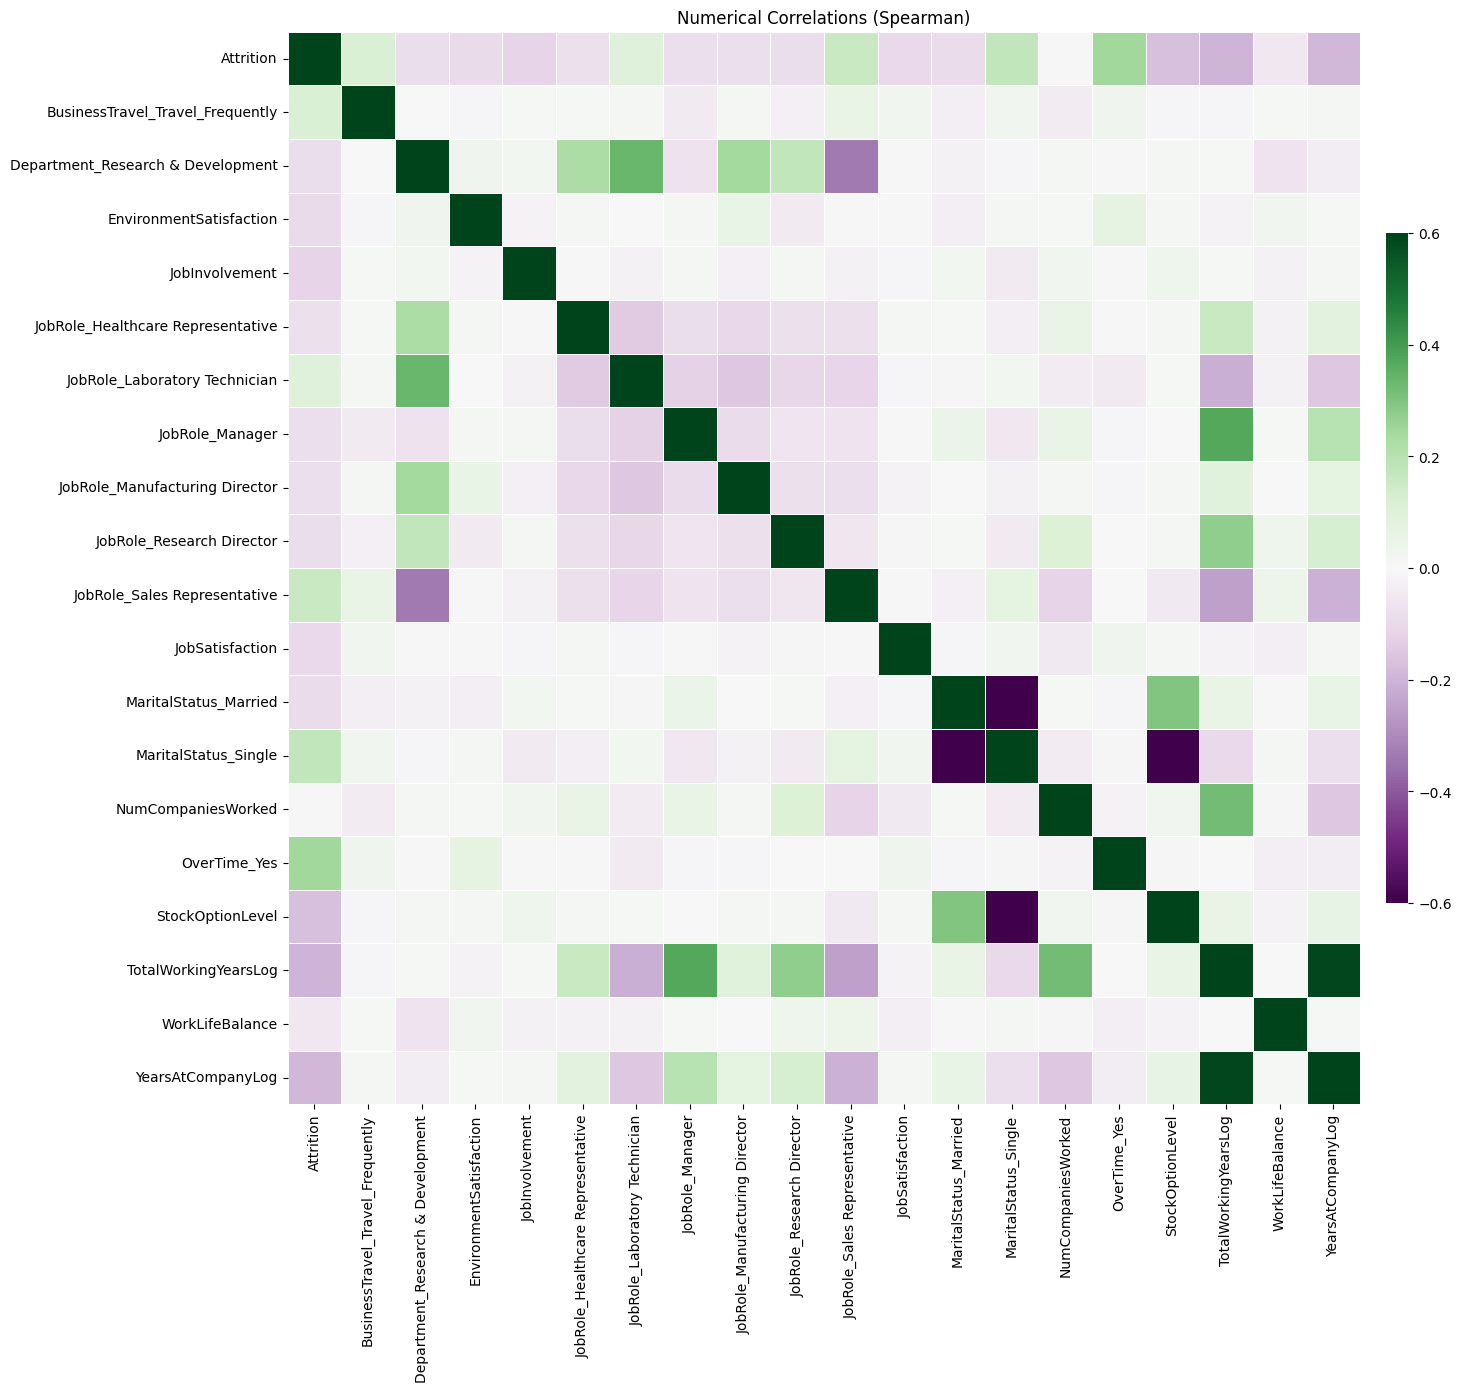

In [16]:
sorted_columns = sorted(correlation_HR_best.columns)
correlation_HR_best_sorted = correlation_HR_best.loc[sorted_columns, sorted_columns]

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_HR_best_sorted, cmap="PRGn", square=True, vmin=-0.6, vmax=0.6, linewidths=0.5, annot=False, cbar_kws={
        'shrink': 0.6,      # Makes colorbar smaller (60% of default)
        'aspect': 30,        # Makes colorbar narrower
        'pad': 0.02          # Adds space between plot and colorbar
    })
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Now there are no more correlations > 0.65 (the cut-off utilised before).

Single and Married should both stay because, although they are mildly correlated, they are both involved in predicting the target and there is a Divorced class that can be inferred from the values of both columns.

In [17]:
HR_best

,Attrition,BusinessTravel_Travel_Frequently,Department_Research & Development,EnvironmentSatisfaction,JobInvolvement,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,JobSatisfaction,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked,OverTime_Yes,StockOptionLevel,TotalWorkingYearsLog,WorkLifeBalance,YearsAtCompanyLog
0,1,False,False,2,3,False,False,False,False,False,False,4,False,True,8.0,True,0,2.197225,1,1.945910
1,0,True,True,3,2,False,False,False,False,False,False,2,True,False,1.0,False,1,2.397895,3,2.397895
2,1,False,True,4,2,False,True,False,False,False,False,3,False,True,6.0,True,0,2.079442,3,0.000000
3,0,True,True,4,3,False,False,False,False,False,False,3,True,False,1.0,True,0,2.197225,3,2.197225
4,0,False,True,1,3,False,True,False,False,False,False,2,True,False,8.5,False,1,1.945910,3,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,True,True,3,4,False,True,False,False,False,False,4,True,False,4.0,False,1,2.890372,3,1.791759
1466,0,False,True,4,2,True,False,False,False,False,False,1,True,False,4.0,False,1,2.302585,3,2.079442
1467,0,False,True,2,4,False,False,False,True,False,False,2,True,False,1.0,True,1,1.945910,3,1.945910
1468,0,True,False,4,2,False,False,False,False,False,False,2,True,False,2.0,False,0,2.890372,2,2.302585


## **3. Feature Engineering**

### **3.1. Create new variables based on domain knowledge**

In [ ]:
# Analyse if big differences between monthly rates and montly income may influence the target variable.
HR_best['rate_income'] = HR_1_1['MonthlyRate'] - HR_1_1['MonthlyIncome']
#HR_best['Income_per_YearAtCompany'] = HR_best['MonthlyIncomeLog'] / (HR_best['YearsAtCompanyLog'] + 1) # unfortunately MonthlyIncomeLog was dropped
HR_best['WorkLifeBalance_OverTime'] = HR_best['WorkLifeBalance'] - HR_best['OverTime_Yes'] # -> -0.23 correlation
HR_best['Job_happiness_score'] = HR_best['JobInvolvement'] + HR_best['JobSatisfaction'] + HR_best['YearsAtCompanyLog'] + HR_best['EnvironmentSatisfaction'] + HR_best['WorkLifeBalance'] - HR_best['OverTime_Yes'] #-> -0.33 correlation
# HR_best['Job_happiness_score_test'] = (HR_best['JobInvolvement'] * HR_best['JobSatisfaction'] * HR_best['YearsAtCompanyLog'] * HR_best['EnvironmentSatisfaction'] * HR_best['WorkLifeBalance']) / (HR_best['OverTime_Yes']+1) -> -0.20 correlation

# 1. Tenure-to-Experience Ratio (loyalty indicator)
HR_best['TenureExperienceRatio'] = HR_best['YearsAtCompanyLog'] / (HR_best['TotalWorkingYearsLog'] + 1e-5)
        
# 2. Income per Year of Experience (earning efficiency)
HR_best['IncomePerExperience'] = HR_1_1['MonthlyIncomeLog'] / (HR_best['TotalWorkingYearsLog'] + 1e-5)
        
# 3. Promotion Recency Score (career momentum)
HR_best['PromotionRecency'] = HR_best['YearsAtCompanyLog'] - HR_1_1['YearsSinceLastPromotionLog']

HR_best.head()

,Attrition,BusinessTravel_Travel_Frequently,Department_Research & Development,EnvironmentSatisfaction,JobInvolvement,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,...,StockOptionLevel,TotalWorkingYearsLog,WorkLifeBalance,YearsAtCompanyLog,rate_income,WorkLifeBalance_OverTime,Job_happiness_score,TenureExperienceRatio,IncomePerExperience,PromotionRecency
0,1,False,False,2,3,False,False,False,False,False,...,0,2.197225,1,1.945910,13486,0,10.945910,0.885618,3.958846,1.945910
1,0,True,True,3,2,False,False,False,False,False,...,1,2.397895,3,2.397895,19777,3,12.397895,0.999996,3.562716,1.704748
2,1,False,True,4,2,False,True,False,False,False,...,0,2.079442,3,0.000000,306,2,11.000000,0.000000,3.676641,0.000000
3,0,True,True,4,3,False,False,False,False,False,...,0,2.197225,3,2.197225,20250,2,14.197225,0.999995,3.629976,0.810930
4,0,False,True,1,3,False,True,False,False,False,...,1,1.945910,3,1.098612,13164,3,10.098612,0.564572,4.189083,0.000000


In [19]:
from scipy.stats import pointbiserialr

# Calculate point biserial correlation
variables = ['rate_income', 'WorkLifeBalance_OverTime', 'Job_happiness_score', 'TenureExperienceRatio', 'IncomePerExperience', 'PromotionRecency']
for variable in variables:
    correlation, p_value = pointbiserialr(HR_best[variable], HR_best['Attrition'])

    print(f"Point Biserial Correlation for {variable}: {correlation:.4f}")
    print(f"P-value for {variable}: {p_value:.4e}")

Point Biserial Correlation for rate_income: 0.1006
P-value for rate_income: 1.1123e-04
Point Biserial Correlation for WorkLifeBalance_OverTime: -0.1840
P-value for WorkLifeBalance_OverTime: 1.1615e-12
Point Biserial Correlation for Job_happiness_score: -0.3088
P-value for Job_happiness_score: 7.5013e-34
Point Biserial Correlation for TenureExperienceRatio: -0.0528
P-value for TenureExperienceRatio: 4.3020e-02
Point Biserial Correlation for IncomePerExperience: 0.0709
P-value for IncomePerExperience: 6.5385e-03
Point Biserial Correlation for PromotionRecency: -0.1566
P-value for PromotionRecency: 1.5646e-09


Job happiness score seems very significantly correlated with Attrition.

In [20]:
correlation_HR_best = HR_best.corr(method='spearman', numeric_only=True)
correlation_HR_best

,Attrition,BusinessTravel_Travel_Frequently,Department_Research & Development,EnvironmentSatisfaction,JobInvolvement,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,...,StockOptionLevel,TotalWorkingYearsLog,WorkLifeBalance,YearsAtCompanyLog,rate_income,WorkLifeBalance_OverTime,Job_happiness_score,TenureExperienceRatio,IncomePerExperience,PromotionRecency
Attrition,1.000000,0.115143,-0.085293,-0.096486,-0.119496,-0.078696,0.098290,-0.083316,-0.082994,-0.088870,...,-0.172296,-0.199320,-0.051951,-0.191121,0.094793,-0.180059,-0.286396,-0.030602,0.180786,-0.164000
BusinessTravel_Travel_Frequently,0.115143,1.000000,0.003340,-0.010527,0.006497,0.008029,0.010023,-0.042583,0.009783,-0.023579,...,-0.013142,-0.011014,0.007543,0.017300,0.012798,-0.012549,0.010446,0.026288,0.002630,-0.022486
Department_Research & Development,-0.085293,0.003340,1.000000,0.031796,0.019049,0.227637,0.336570,-0.071356,0.240754,0.174596,...,0.016358,0.009327,-0.067055,-0.035285,0.037279,-0.054208,-0.016589,-0.036413,-0.063974,-0.002104
EnvironmentSatisfaction,-0.096486,-0.010527,0.031796,1.000000,-0.015301,0.011491,0.000764,0.011842,0.059655,-0.046003,...,0.009826,-0.014143,0.027169,0.008352,0.035203,-0.018454,0.520649,0.013484,0.013636,-0.019048
JobInvolvement,-0.119496,0.006497,0.019049,-0.015301,1.000000,-0.001826,-0.019011,0.016936,-0.024833,0.016192,...,0.034464,0.006232,-0.019889,0.014365,-0.014338,-0.013749,0.317539,-0.022541,-0.020762,0.022674
JobRole_Healthcare Representative,-0.078696,0.008029,0.227637,0.011491,-0.001826,1.000000,-0.144652,-0.085409,-0.103472,-0.075038,...,0.018367,0.155765,-0.021639,0.083753,-0.040936,-0.021942,0.050431,-0.041133,-0.125410,0.031132
JobRole_Laboratory Technician,0.098290,0.010023,0.336570,0.000764,-0.019011,-0.144652,1.000000,-0.126280,-0.152987,-0.110947,...,0.008543,-0.214897,-0.020796,-0.154295,0.155792,0.013608,-0.077662,0.030169,0.118498,-0.044653
JobRole_Manager,-0.083316,-0.042583,-0.071356,0.011842,0.016936,-0.085409,-0.126280,1.000000,-0.090330,-0.065508,...,0.003204,0.371603,0.006422,0.198098,-0.261348,0.009834,0.080470,-0.113048,-0.286849,0.008925
JobRole_Manufacturing Director,-0.082994,0.009783,0.240754,0.059655,-0.024833,-0.103472,-0.152987,-0.090330,1.000000,-0.079362,...,0.014348,0.090741,0.000782,0.073392,-0.037403,0.005349,0.042861,-0.002673,-0.053414,0.070101
JobRole_Research Director,-0.088870,-0.023579,0.174596,-0.046003,0.016192,-0.075038,-0.110947,-0.065508,-0.079362,1.000000,...,0.014646,0.272862,0.036570,0.123285,-0.204117,0.025212,0.030782,-0.082753,-0.188780,0.054995


### **3.2. Testing whether new variables introduce redundant information**

We should now test whether the new feature engineering variables generate new redundant information with the previous dataset.

In [21]:
# This cell was meant to test whether the new feature engineering variables are redundant with the rest

# If two variables are correlated, we drop one of them, keeping the variable with largest correlation with the target

# Compute correlation matrix
corr_matrix = HR_best.corr().abs()

# Target variable correlation
target = 'Attrition'
target_corr = corr_matrix[target].drop(target)  # drop self-correlation

# Correlation threshold
threshold = 0.65

# Initialize set for dropped columns
drop_cols = set()

# Iterate over the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    col1 = corr_matrix.columns[i]
    if col1 == target or col1 in drop_cols:
        continue

    for j in range(i + 1, len(corr_matrix.columns)):
        col2 = corr_matrix.columns[j]
        if col2 == target or col2 in drop_cols:
            continue

        # Check correlation between two features
        if corr_matrix.iloc[i, j] > threshold:
            # Compare correlation with target
            corr1 = target_corr.get(col1, 0)
            corr2 = target_corr.get(col2, 0)

            # Drop the one with smaller correlation to target
            if corr1 >= corr2:
                drop_cols.add(col2)
            else:
                drop_cols.add(col1)

print("Columns to drop due to high correlation:", drop_cols)
print("Number of columns to drop:", len(drop_cols))

# Create final dataset
#HR_best_final = HR_best.drop(columns=list(drop_cols))
#print("Final dataset shape:", HR_best_final.shape)
#HR_best_final.head()


Columns to drop due to high correlation: {'WorkLifeBalance'}
Number of columns to drop: 1


The previous cell suggested we remove WorkLifeBalance, as it was significantly correlated (>0.65) with WorkLifeBalance_OverTime.

However, we will make the decision of keeping WorkLifeBalance instead of the new feature engineered variable.

We will keep Job_happiness_score as it was not considered redundant with its original variables.

In [22]:
# drop WorkLifeBalance_OverTime
HR_best.drop('WorkLifeBalance_OverTime', axis=1, inplace=True)
HR_best

,Attrition,BusinessTravel_Travel_Frequently,Department_Research & Development,EnvironmentSatisfaction,JobInvolvement,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,...,OverTime_Yes,StockOptionLevel,TotalWorkingYearsLog,WorkLifeBalance,YearsAtCompanyLog,rate_income,Job_happiness_score,TenureExperienceRatio,IncomePerExperience,PromotionRecency
0,1,False,False,2,3,False,False,False,False,False,...,True,0,2.197225,1,1.945910,13486,10.945910,0.885618,3.958846,1.945910
1,0,True,True,3,2,False,False,False,False,False,...,False,1,2.397895,3,2.397895,19777,12.397895,0.999996,3.562716,1.704748
2,1,False,True,4,2,False,True,False,False,False,...,True,0,2.079442,3,0.000000,306,11.000000,0.000000,3.676641,0.000000
3,0,True,True,4,3,False,False,False,False,False,...,True,0,2.197225,3,2.197225,20250,14.197225,0.999995,3.629976,0.810930
4,0,False,True,1,3,False,True,False,False,False,...,False,1,1.945910,3,1.098612,13164,10.098612,0.564572,4.189083,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,True,True,3,4,False,True,False,False,False,...,False,1,2.890372,3,1.791759,9719,15.791759,0.619904,2.716748,1.791759
1466,0,False,True,4,2,True,False,False,False,False,...,False,1,2.302585,3,2.079442,11466,12.079442,0.903086,3.999635,1.386294
1467,0,False,True,2,4,False,False,False,True,False,...,True,1,1.945910,3,1.945910,-968,11.945910,0.999995,4.482747,1.945910
1468,0,True,False,4,2,False,False,False,False,False,...,False,0,2.890372,2,2.302585,7853,12.302585,0.796637,2.972786,2.302585


### **3.3. Final correlation plot of the best and engineered variables**

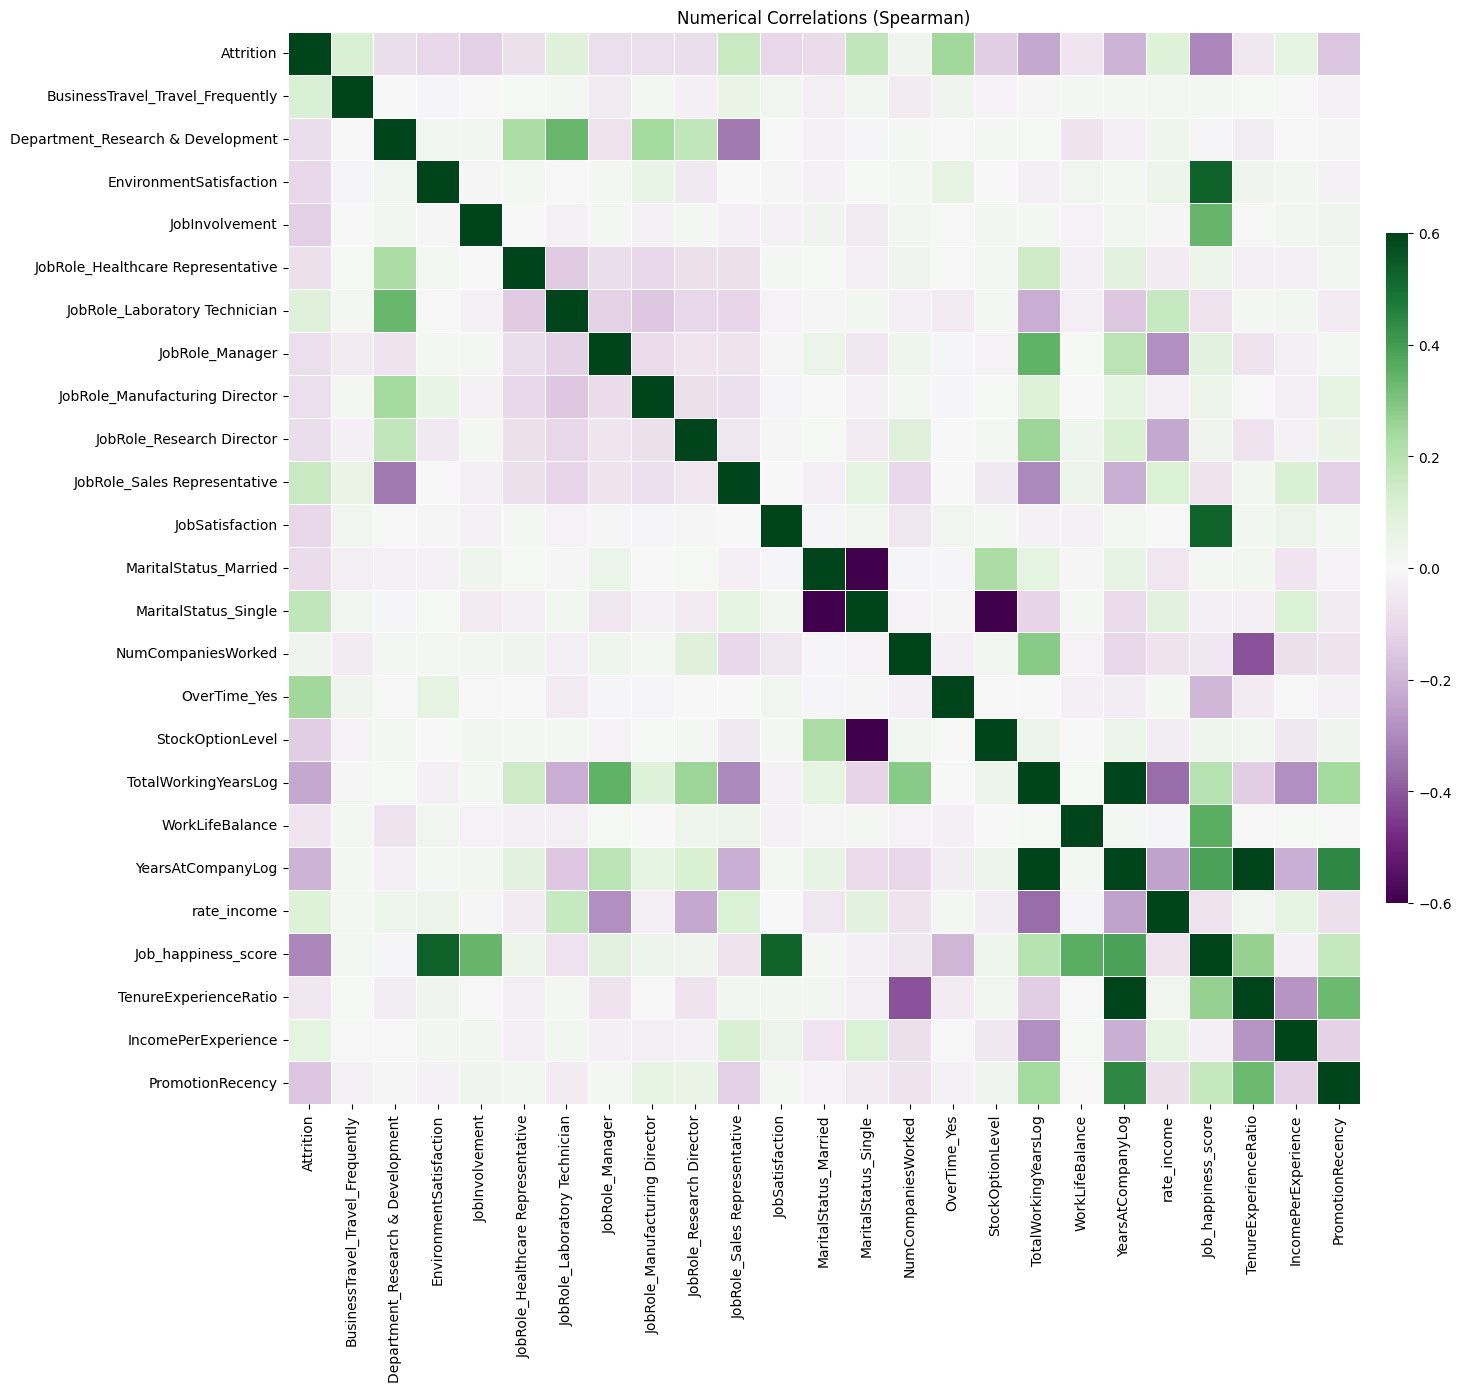

In [23]:
corr_final = HR_best.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_final, cmap="PRGn", square=True, linewidths=0.5, vmin=-0.6, vmax=0.6, annot=False, cbar_kws={
        'shrink': 0.6,      # Makes colorbar smaller (60% of default)
        'aspect': 30,        # Makes colorbar narrower
        'pad': 0.02          # Adds space between plot and colorbar
    })
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

The plot above shows that all the features that remain in the dataset are somehow correlated with Attrition.

## **4. Saving the best DataFrame and Final Insights**

In [24]:
# Save the processed dataset
HR_best.to_csv('data/processed/HR_best_features.csv', index=True)

The variables: 
- BusinessTravel
- Department
- EnvironmentSatisfaction
- JobInvolvement
- JobRole
- JobSatisfaction 
- MaritalStatus
- NumCompaniesWorked
- OverTime  
- TotalWorkingYears
- WorkLifeBalance
- YearsAtCompany

all seem relevant to predict if a person will leave the company or not.